In [16]:
import pandas as pd

In [17]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')


In [18]:
#finding  if there are any missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


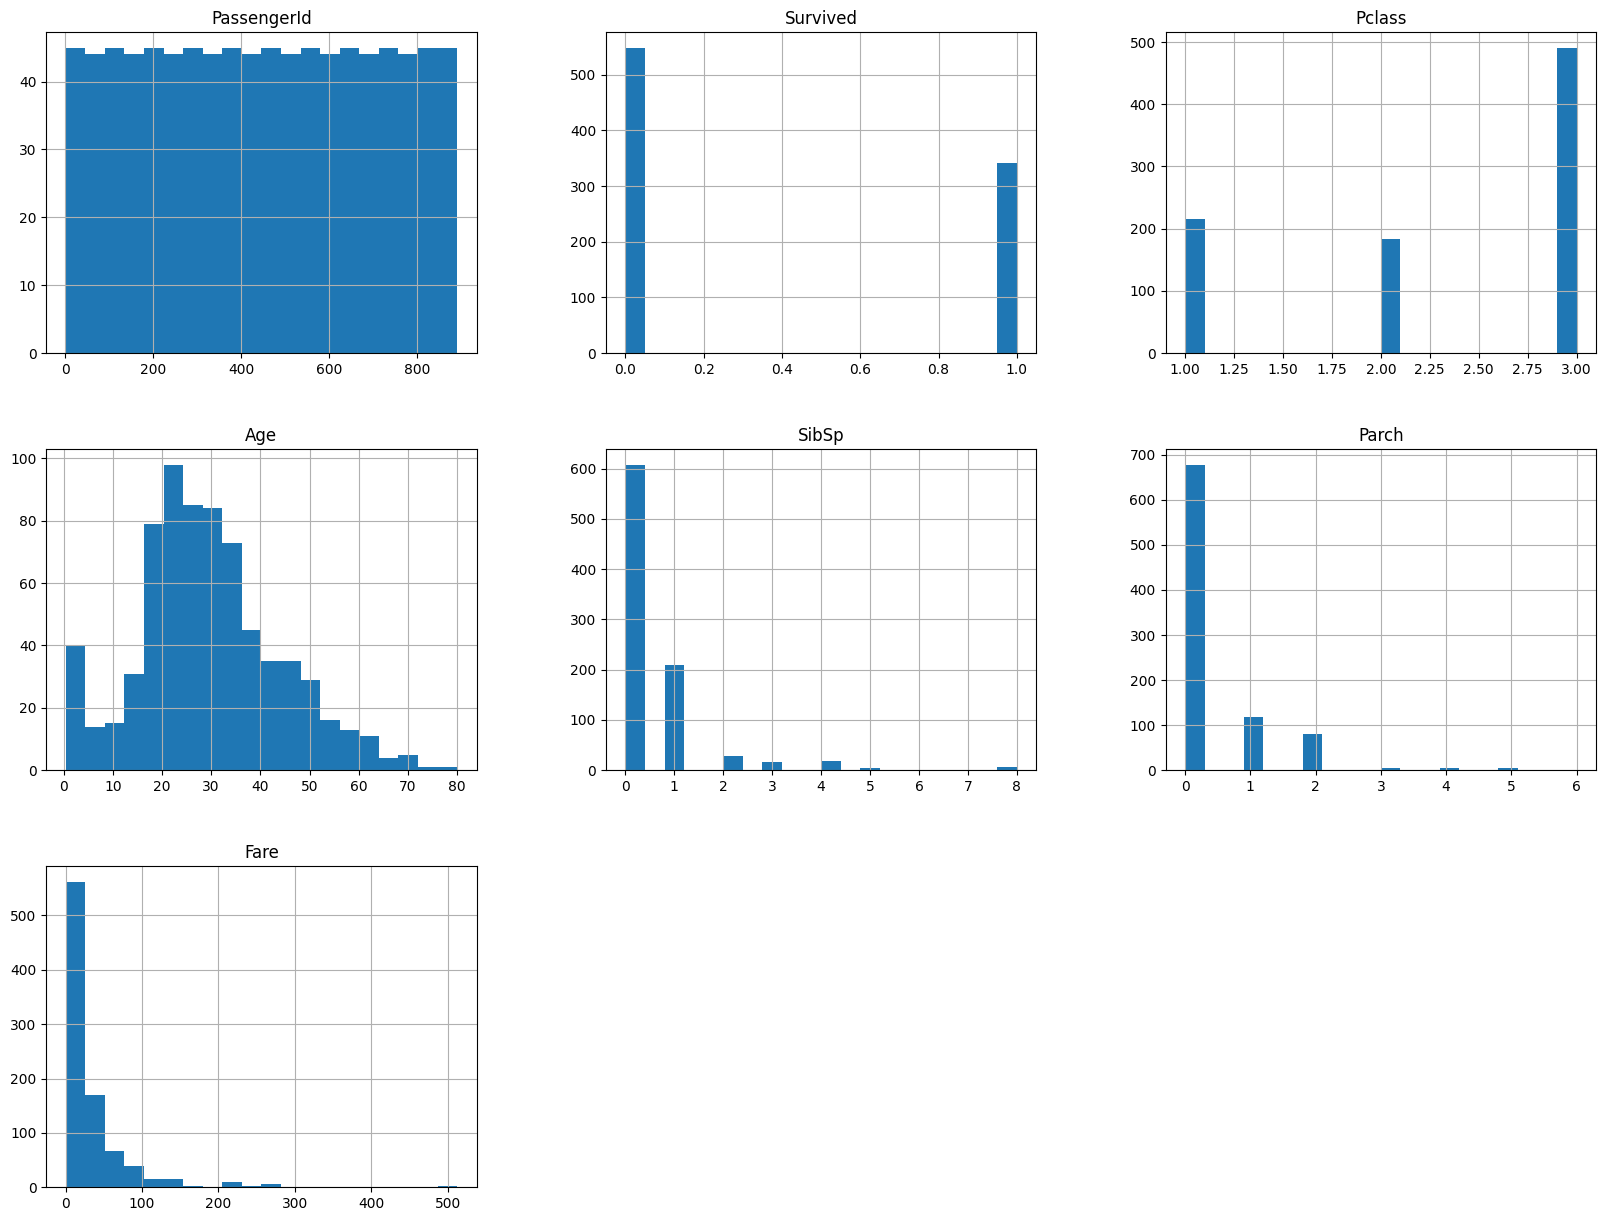

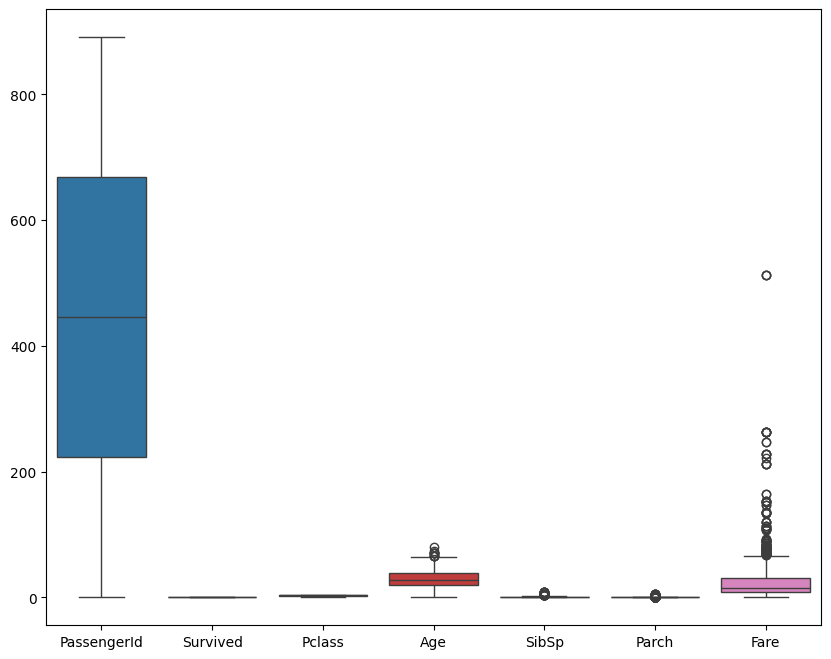

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_df.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.show()


From the box plot we can see that fare and age has high outliters, and they are positively skewed


In [20]:
# Fill missing values for 'Age' with median, 'Embarked' with mode, 'Fare' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop 'Cabin' as it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


In [21]:
# One-hot encoding for 'Sex' and 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb


# Features and target
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']

# Split into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:


# Create datasets for LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

#making lbgm dataset for training and vaidation
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model with early stopping
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_val],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Predictions
y_pred_lgb = (lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration) > 0.5).astype(int)

# Evaluation
print("LightGBM Performance")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lgb):.2f}")
print(f"Precision: {precision_score(y_val, y_pred_lgb):.2f}")
print(f"Recall: {recall_score(y_val, y_pred_lgb):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lgb):.2f}")



[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [24]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.05, max_depth=6, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)

# Evaluation
print("XGBoost Performance")
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_val, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_val, y_pred_xgb):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred_xgb):.2f}")


XGBoost Performance
Accuracy: 0.83
Precision: 0.84
Recall: 0.72
F1 Score: 0.77


In [25]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.05, max_depth=6, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)

# Evaluation
print("XGBoost Performance")
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_val, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_val, y_pred_xgb):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred_xgb):.2f}")


XGBoost Performance
Accuracy: 0.83
Precision: 0.84
Recall: 0.72
F1 Score: 0.77


In [26]:
print("Comparative Analysis:")
print(f"LightGBM - Accuracy: {accuracy_score(y_val, y_pred_lgb):.2f}, Precision: {precision_score(y_val, y_pred_lgb):.2f}, Recall: {recall_score(y_val, y_pred_lgb):.2f}, F1 Score: {f1_score(y_val, y_pred_lgb):.2f}")
print(f"XGBoost - Accuracy: {accuracy_score(y_val, y_pred_xgb):.2f}, Precision: {precision_score(y_val, y_pred_xgb):.2f}, Recall: {recall_score(y_val, y_pred_xgb):.2f}, F1 Score: {f1_score(y_val, y_pred_xgb):.2f}")


Comparative Analysis:
LightGBM - Accuracy: 0.80, Precision: 0.78, Recall: 0.73, F1 Score: 0.76
XGBoost - Accuracy: 0.83, Precision: 0.84, Recall: 0.72, F1 Score: 0.77


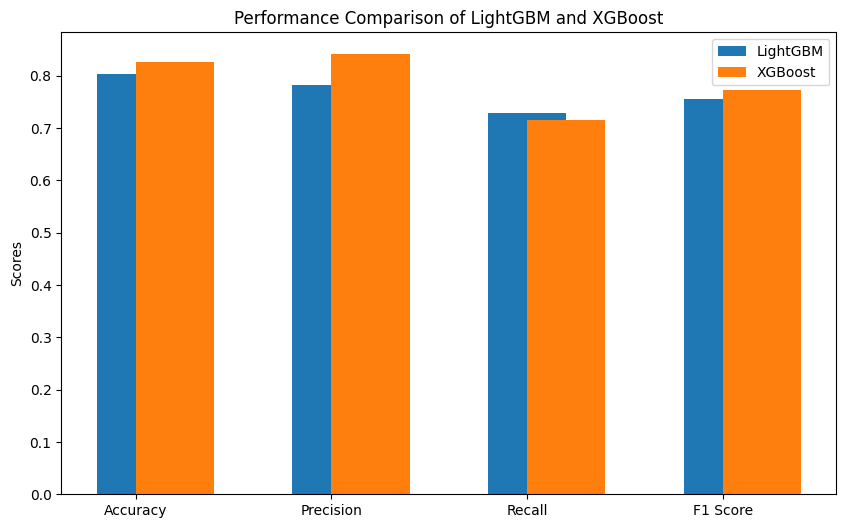

In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_lgb), recall_score(y_val, y_pred_lgb), f1_score(y_val, y_pred_lgb)]
xgb_scores = [accuracy_score(y_val, y_pred_xgb), precision_score(y_val, y_pred_xgb), recall_score(y_val, y_pred_xgb), f1_score(y_val, y_pred_xgb)]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', align='edge')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()


AS shown in the bar plot and the early comparison of LGBM and XGBM, we can see that XGBM preformed better overall but it depends on your requirment as we can see LGBM can capture more postive cases .i.e recall is higher then XGBM